In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Nouvelle section

In [2]:
#we will create the data frame with read_csv() and parameters as “delimiter” and “names”.
df_train= pd.read_csv('train.txt',delimiter=';',names=['text','label'] )
df_val= pd.read_csv('val.txt',delimiter=';',names=['text','label'] )

In [3]:
# we will concat both datset
df=pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df.label

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
17995    sadness
17996        joy
17997        joy
17998        joy
17999        joy
Name: label, Length: 18000, dtype: object

<Axes: xlabel='count', ylabel='label'>

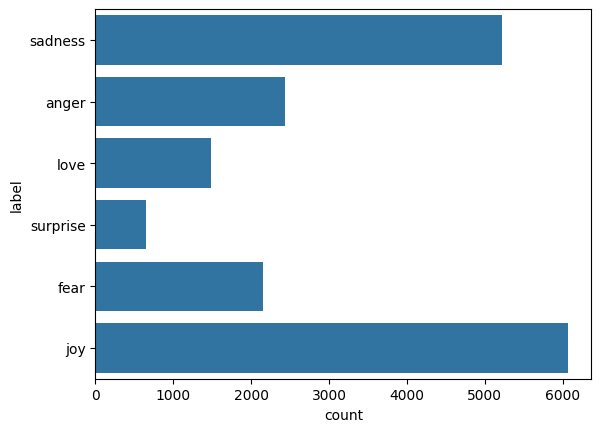

In [5]:
sns.countplot(df.label)

1. Positive Sentiment – “joy”,”love”,”surprise”

2. Negative Sentiment – “anger”,”sadness”,”fear”

In [6]:
df.label.replace({'joy':1,'love':1,'surprise':1, 'anger':0,'sadness':0,'fear':0},inplace=True)
df.label

0        0
1        0
2        0
3        1
4        0
        ..
17995    0
17996    1
17997    1
17998    1
17999    1
Name: label, Length: 18000, dtype: int64

<Axes: ylabel='count'>

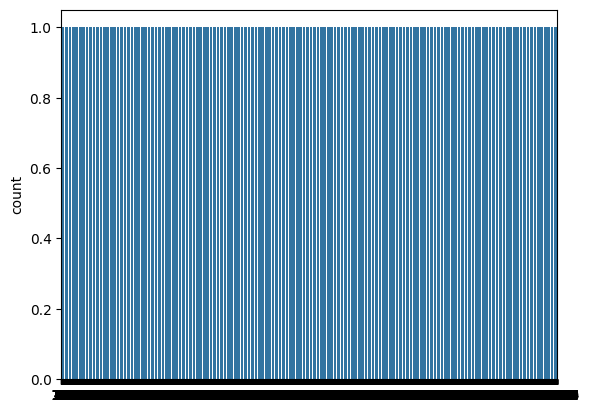

In [7]:
sns.countplot(df.label)

### cleaning the data
BoW/TF-IDF is uded to convert text into numeric vector
- Step1: preprocess and remove punctuations [,./?} ]
- step2: Lower the text
- step3: create lemmatization/stemning
- step4: remove stopwords from text
- step5: Creating the Bag of Word (BoW) model

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [9]:
#object of WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
corpus=[]
for i in range(len(df)):
    review= re.sub('[^a-zAZ]',' ',df['text'][i])
    review= review.lower()
    review= review.split()
    review= [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)



In [14]:
corpus[1]

'go feeling hopeless damned hopeful around someone care awake'

##### Scikit-Learn (Machine Learning Library for Python)

1. CountVectorizer – transform text to vectors

In [15]:
# Now we will convert this text inot vector
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
traindata= cv.fit_transform(corpus)
X= traindata #Independent features
y= df.label # dependent features

In [16]:
X.shape,y.shape

((18000, 14295), (18000,))

### Building the model on training data
Now comes the machine learning model creation part and in this project, I’m going to use Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### Test Data Transformation
Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.


In [18]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [19]:
test_df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [20]:
#object of WordNetLemmatizer
wordnet = WordNetLemmatizer()
corpus=[]
for i in range(len(test_df)):
    review= re.sub('[^a-zAZ]',' ',test_df['text'][i])
    review= review.lower()
    review= review.split()
    review= [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)

X_test= cv.transform(corpus)
y_test=test_df.label.replace({'joy':1,'love':1,'surprise':1, 'anger':0,'sadness':0,'fear':0})



### Model Evaluation
We will evaluate our model using various metrics such as Accuracy Score, Precision Score, Recall Score, Confusion Matrix.

In [21]:
y_pred= rf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm= confusion_matrix(y_test,y_pred)
print(cm)
report= classification_report(y_test,y_pred)
print(report)

0.951
[[1009   71]
 [  27  893]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1080
           1       0.93      0.97      0.95       920

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [23]:
from transformers import pipeline

# Chargement du modèle pré-entraîné
classifier = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion")

def predict_emotion(text):
    result = classifier(text)
    return result[0]['label'], result[0]['score']

# Saisie de l'utilisateur
user_input = input("Entrez votre message : ")
emotion, confidence = predict_emotion(user_input)

print(f"Prédiction d'émotion : {emotion} avec une confiance de {confidence:.2f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Entrez votre message : aziz is sad
Prédiction d'émotion : sadness avec une confiance de 0.98
